In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import resample
from itertools import combinations

In [19]:
df = pd.read_csv('wine-training.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               119 non-null    float64
 1   malic_acid            119 non-null    float64
 2   ash                   119 non-null    float64
 3   alcalinity_of_ash     119 non-null    float64
 4   magnesium             119 non-null    int64  
 5   total_phenols         119 non-null    float64
 6   flavanoids            119 non-null    float64
 7   nonflavanoid_phenols  119 non-null    float64
 8   proanthocyanins       119 non-null    float64
 9   color_intensity       119 non-null    float64
 10  hue                   119 non-null    float64
 11  od                    119 non-null    float64
 12  proline               119 non-null    int64  
 13  wine                  119 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 13.1 KB


In [38]:
df['flavanoids']
# this correlates very well with the output:
# low flavanoids, class 2, high, class 0

,flavanoids
0,2.88
1,0.34
2,2.50
3,1.28
4,0.66
...,...
114,2.86
115,2.03
116,3.64
117,1.46


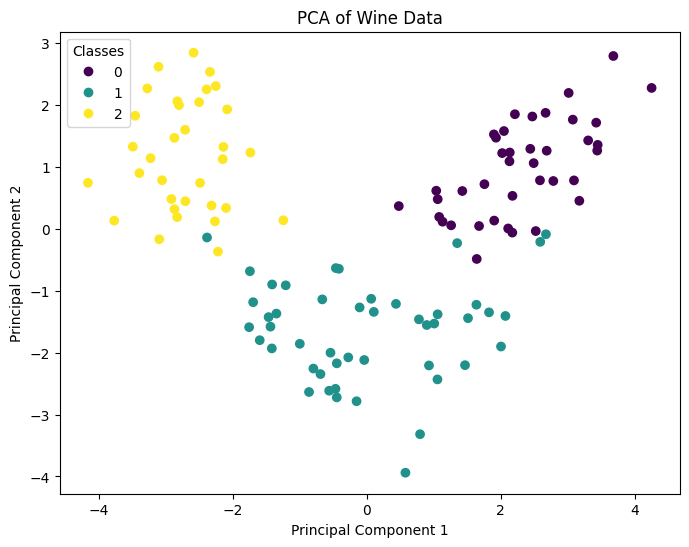

Cross-validation accuracy scores: [1.         1.         1.         0.92857143 1.        ]
Mean CV accuracy: 0.9857142857142858
Test set accuracy: 0.9791666666666666


In [78]:
# # Correlation Matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title("Correlation Matrix")
# plt.show()

# Visualizing with PCA
features = df.drop(columns=['wine'])
target = df['wine']

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(components[:, 0], components[:, 1], c=target, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Wine Data")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.4, stratify=target)

# Building a simple Logistic Regression model
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())

# Fit the model on the full training set and evaluate on the test set
model.fit(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

In [80]:
holdout = pd.read_csv('wine-holdout.csv')

holdout_scaled = scaler.fit_transform(holdout)

pd.DataFrame(model.predict(holdout_scaled), columns=['Class']).to_csv("tylerbartle-ice1-predictions.csv", index=False)
# model.predict(holdout_scaled)